In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ECG = np.loadtxt('../data/ECGu.txt')
print (ECG)
print (ECG.shape)

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)


   -275.0\t -119.0\t -119.0\t   time_s
0  -275.0\t -119.0\t -119.0\t    0.000
1  -275.0\t -118.0\t -121.0\t    0.001
2  -275.0\t -121.0\t -112.0\t    0.002
3  -273.0\t -120.0\t -105.0\t    0.003
4  -274.0\t -124.0\t -101.0\t    0.004


/var/folders/2c/jbnxvlms7fscnlvrm9rs3qkw0000gn/T/ipykernel_7056/3836098838.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


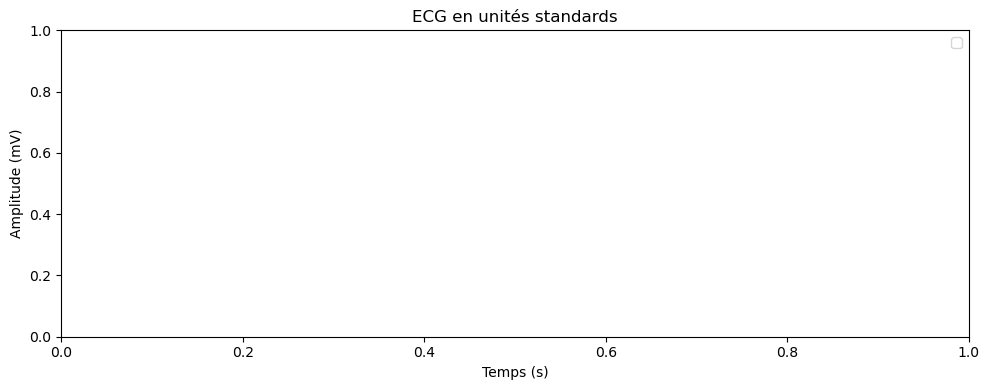

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- paramètres du fabricant ---
FS = 1000.0                 # fréquence d'échantillonnage en Hz
GAIN_UV_PER_UNIT = 1024.0   # µV par unité
UNIT_TO_MV = GAIN_UV_PER_UNIT / 1000.0  # = 1.024 mV / unité

# --- chargement du fichier (adapte le nom) ---
df = pd.read_csv("../data/ECGu.txt")

# --- reconstruction du temps en secondes ---
N = len(df)
df["time_s"] = np.arange(N) / FS

# --- conversion des leads en mV ---
for lead in ["I", "II", "III"]:
    if lead in df.columns:
        df[lead] = df[lead].astype(float) * UNIT_TO_MV

# --- aperçu ---
print(df.head())

# --- tracé rapide ---
plt.figure(figsize=(10,4))
for lead in ["I","II","III"]:
    if lead in df.columns:
        plt.plot(df["time_s"], df[lead], label=f"Lead {lead}")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.title("ECG en unités standards")
plt.tight_layout()
plt.show()


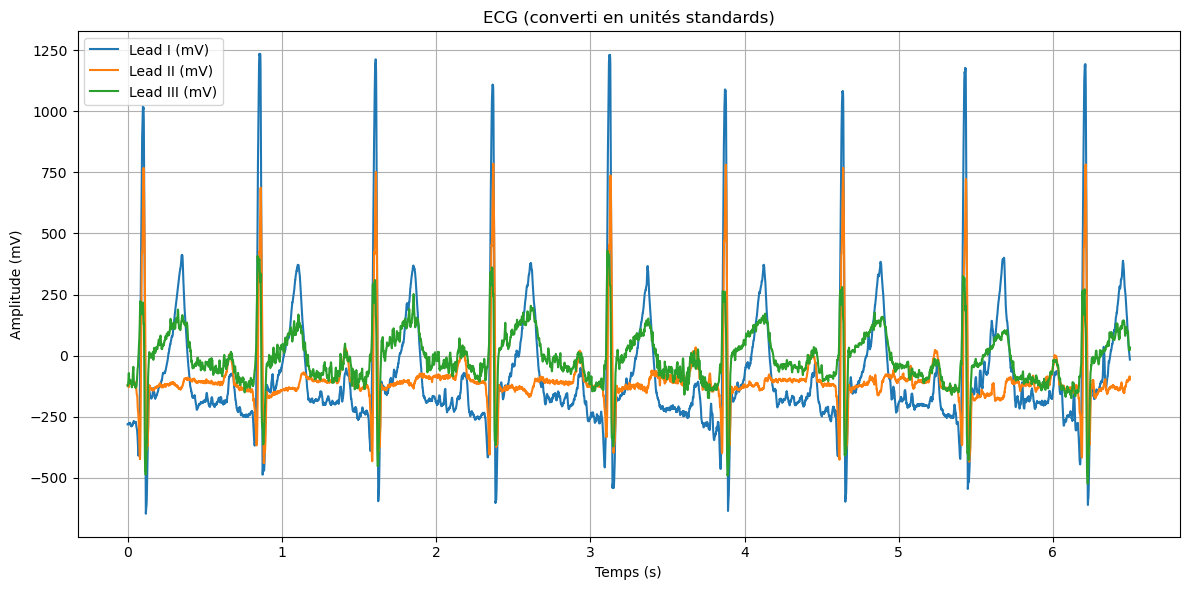

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- paramètres ---
FS = 1000.0
GAIN_UV_PER_UNIT = 1024.0
UNIT_TO_MV = GAIN_UV_PER_UNIT / 1000.0  # 1.024 mV / unité

# --- chargement du fichier (tabulation ou espaces) ---
data = np.loadtxt("../data/ECGu.txt")  # pas de names=True

# --- reconstruction du temps ---
N = data.shape[0]
time_s = np.arange(N) / FS

# --- conversion des leads ---
lead_I   = data[:,0] * UNIT_TO_MV   # 1ère colonne
lead_II  = data[:,1] * UNIT_TO_MV   # 2ème colonne
lead_III = data[:,2] * UNIT_TO_MV   # 3ème colonne

# --- tracé ---
plt.figure(figsize=(12,6))
plt.plot(time_s, lead_I,  label="Lead I (mV)")
plt.plot(time_s, lead_II, label="Lead II (mV)")
plt.plot(time_s, lead_III,label="Lead III (mV)")

plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG (converti en unités standards)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Realistic ECG Plot

## Goal
Produce a realistic ECG plot with three leads separated, scaled properly, and a red grid similar to clinical ECG paper.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
FS = 1000.0
# Conversion factor
GAIN_UV_PER_UNIT = 1024.0
UNIT_TO_MV = GAIN_UV_PER_UNIT / 1000.0


## Method
We decompose the task into subproblems:
1. Load ECG data from a text file.
2. Convert raw units to mV for each lead.
3. Downsample data to speed up plotting for large files.
4. Plot each lead separately with realistic red grid.
5. Use functions to organize the workflow.


In [2]:
# Function to load ECG data
def load_data(filepath):
    """Load ECG data from a text file."""
    data = np.loadtxt(filepath)
    return data

# Function to convert raw leads to mV
def convert_leads(data, gain_uv_per_unit=1024.0):
    """Convert raw units to mV for each lead."""
    unit_to_mv = gain_uv_per_unit / 1000.0
    lead_I = data[:,0] * unit_to_mv
    lead_II = data[:,1] * unit_to_mv
    lead_III = data[:,2] * unit_to_mv
    return lead_I, lead_II, lead_III

# Function to plot realistic ECG
def plot_ecg(time_s, leads, labels, step=5):
    """
    Plot 3 leads with realistic ECG style.
    - Downsample data to speed up plotting.
    - Plot background white with red grid.
    - Each lead on separate subplot with correct amplitude scale.
    """
    # Downsample
    time_plot = time_s[::step]
    leads_plot = [lead[::step] for lead in leads]

    # ECG grid parameters
    small_x, small_y = 0.04, 0.1   # 1 small square: 0.04 s × 0.1 mV
    big_factor = 5                  # 1 big square = 5 small squares

    fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    fig.patch.set_facecolor('white')  # global white background

    for ax, lead, label in zip(axs, leads_plot, labels):
        ax.set_facecolor('white')
        ax.plot(time_plot, lead, color='blue')
        ax.set_title(label)
        ax.set_ylabel("mV")

        # Keep realistic amplitude scale
        y_margin = 0.1 * (lead.max() - lead.min())
        y_min, y_max = lead.min() - y_margin, lead.max() + y_margin
        ax.set_ylim(y_min, y_max)
        ax.set_xlim(time_plot[0], time_plot[-1])

        # Major grid (big squares)
        ax.set_xticks(np.arange(time_plot[0], time_plot[-1], small_x * big_factor))
        ax.set_yticks(np.arange(np.floor(y_min), np.ceil(y_max)+small_y*big_factor, small_y*big_factor))
        ax.grid(which='major', color='red', linestyle='-', linewidth=1.0)

        # Minor grid (small squares)
        ax.set_xticks(np.arange(time_plot[0], time_plot[-1], small_x), minor=True)
        ax.set_yticks(np.arange(np.floor(y_min), np.ceil(y_max)+small_y, small_y), minor=True)
        ax.grid(which='minor', color='red', linestyle='-', linewidth=0.5)

    axs[-1].set_xlabel("Time (s)")
    plt.tight_layout()
    plt.show()


# ECG standard grid: https://ecglibrary.com/norm.php
# Matplotlib subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


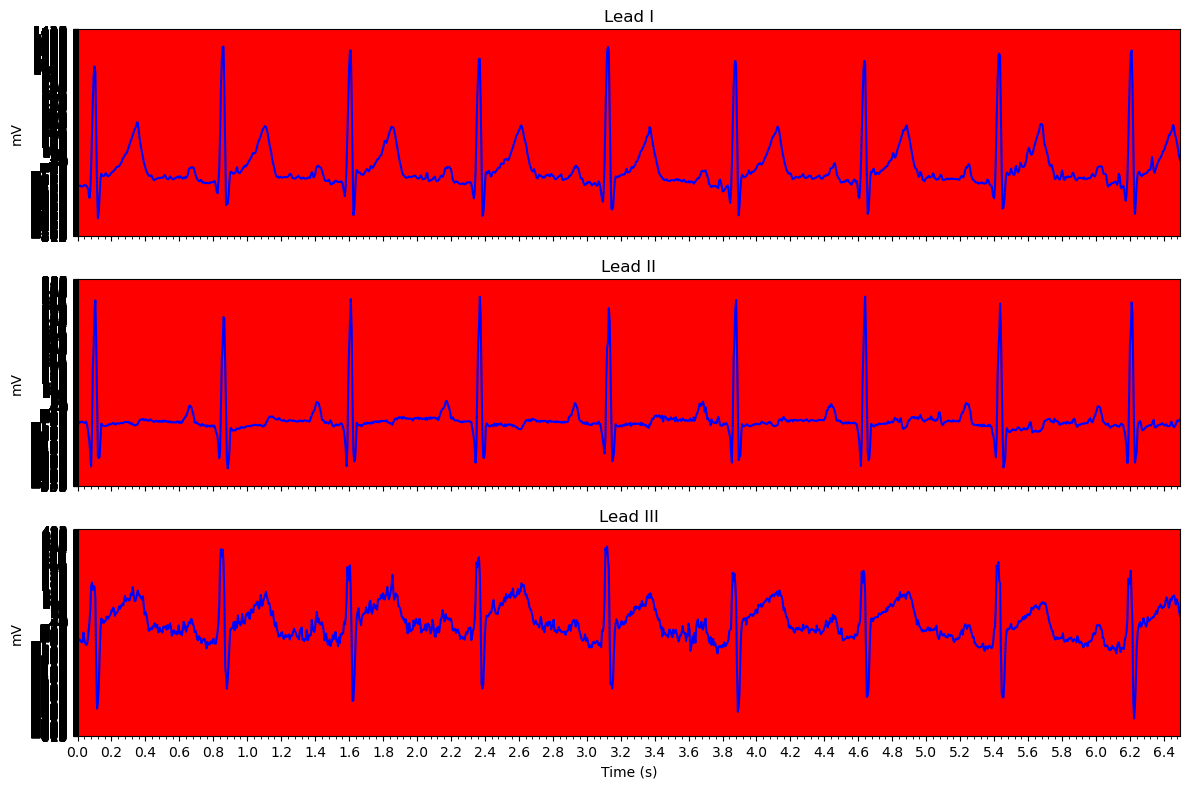

In [3]:
# Load data
data = load_data("../data/ECGu.txt")

# Convert leads
lead_I, lead_II, lead_III = convert_leads(data)
leads = [lead_I, lead_II, lead_III]
labels = ["Lead I", "Lead II", "Lead III"]

# Time vector
time_s = np.arange(data.shape[0]) / FS

# Plot ECG
plot_ecg(time_s, leads, labels, step=5)


## References
- ECG standard grid: https://ecglibrary.com/norm.php
- Matplotlib subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
